# classical.ipynb

This notebook performs the full hypothesis-testing analysis.  
The main notebook reports only the final results.

The functions `plot_discount_groups()` and `plot_category_sales()` are called from the main notebook.

<br>
<br>


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%run parse_data.ipynb


In [2]:
df.head()
df.describe()


,Profit,Sales_amount,Quantity,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,28.656896,229.858001,3.789574,0.156203
std,234.260108,623.245101,2.225110,0.206452
min,-6599.978000,0.444000,1.000000,0.000000
25%,1.728750,17.280000,2.000000,0.000000
50%,8.666500,54.490000,3.000000,0.200000
75%,29.364000,209.940000,5.000000,0.200000
max,8399.976000,22638.480000,14.000000,0.800000


In [3]:
def corr(x, y):
    return np.corrcoef(x, y)[0,1]

def ttest(group1, group2):
    return stats.ttest_ind(group1, group2, equal_var=False)

def mannwhitney(group1, group2):
    return stats.mannwhitneyu(group1, group2, alternative='two-sided')


## Hypothesis 1: Discount rates differ between high-profit and high-loss orders

**Research question:**  
Do transactions with very high positive profit (>500) and very high negative profit (<–500) have different discount patterns?

**Null hypothesis (H0):**  
The average discount is the same in both groups.

**Alternative hypothesis (H1):**  
The average discount differs between the groups.

**Test used:**  
Two-sample t-test (unequal variance).

**Reason for selecting thresholds:**  
This follows the instructor’s recommendation to filter out near-zero profit orders to better observe profit-driving factors.


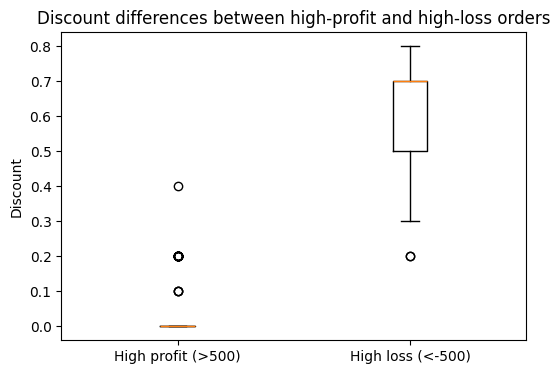

In [4]:
def plot_discount_groups():   
    high_profit = df[df['Profit'] > 500]
    high_loss   = df[df['Profit'] < -500]
    
    stats.ttest_ind(high_profit['Discount'], high_loss['Discount'], equal_var=False)
    
    plt.figure(figsize=(6,4))
    plt.boxplot([high_profit['Discount'], high_loss['Discount']],
                labels=['High profit (>500)', 'High loss (<-500)'])
    plt.ylabel('Discount')
    plt.title('Discount differences between high-profit and high-loss orders')
    plt.show()

plot_discount_groups()

## Hypothesis 2: Sales amounts differ across product categories among high-profit orders

**Research question:**  
Do high-profit transactions (>500 profit) vary in sales performance across product categories?

**Null hypothesis (H0):**  
All categories have the same mean sales amount.

**Alternative hypothesis (H1):**  
At least one category differs.

**Test used:**  
One-way ANOVA.

**Business interpretation:**  
If categories differ significantly, this indicates structural differences in what types of high-profit items consumers buy.


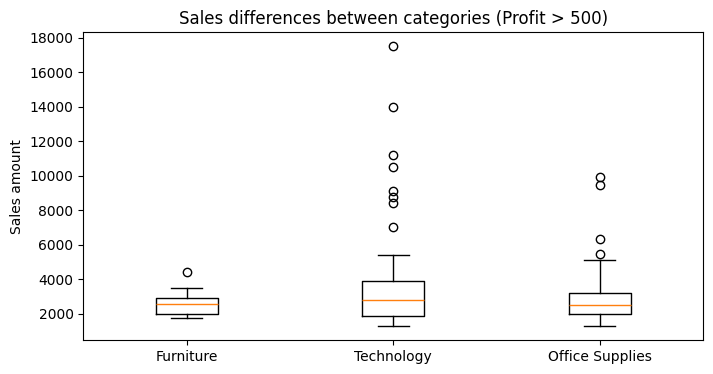

In [5]:
def plot_category_sales():   
    hp = df[df['Profit'] > 500]
    
    cat_groups = [hp[hp['Category'] == cat]['Sales_amount'] for cat in hp['Category'].unique()]
    stats.f_oneway(*cat_groups)
    
    plt.figure(figsize=(8,4))
    plt.boxplot(cat_groups, labels=hp['Category'].unique())
    plt.ylabel('Sales amount')
    plt.title('Sales differences between categories (Profit > 500)')
    plt.show()

plot_category_sales()